# Preceding Steps

## Library and Data Imports

In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


# import data from csv
filename = "edlich-kmeans-A0.csv"
with open(filename, 'r') as f:
    data = np.array(list(csv.reader(f)))

# converting elements to float & delete header
data = data[1:].astype(np.float)

# show top 5 elements of data
data[:5]

array([[-5.34023562,  4.7472463 ,  3.82332607],
       [-9.58706542, -3.43446551,  9.70183939],
       [-8.38501223, -3.90279369,  8.51462008],
       [ 5.7082258 ,  2.65857479,  5.40448245],
       [-7.43166517, -4.39025105,  9.00321635]])

## Plotting the Data

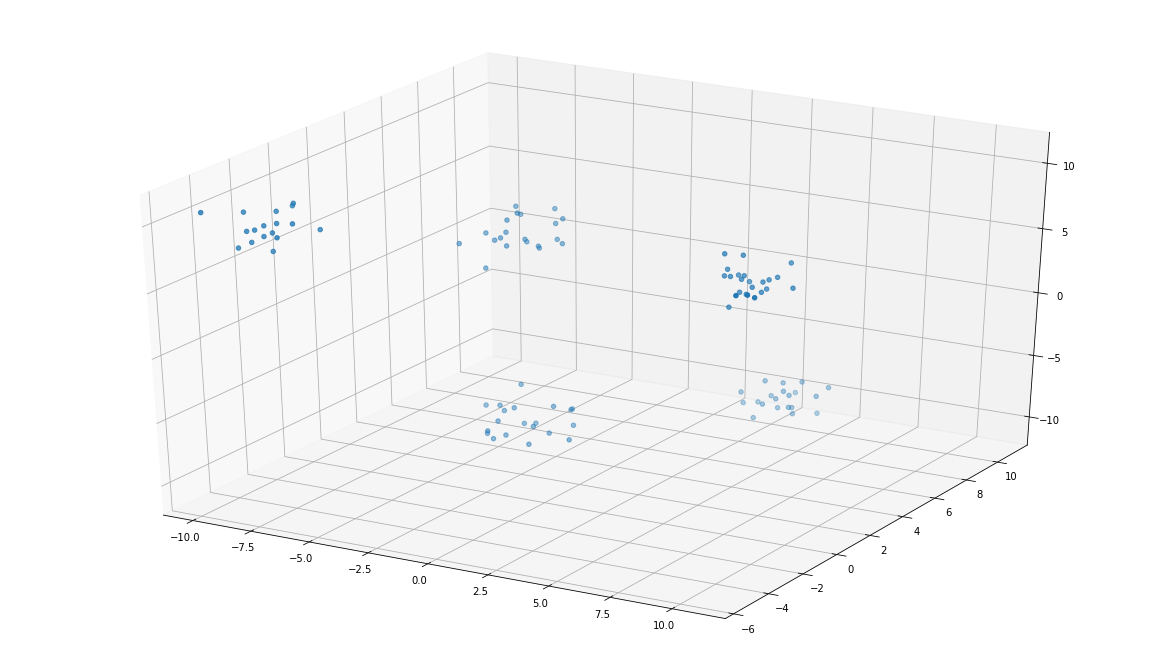

In [2]:
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2])

# Calculate KMeans Clusters, Lables and Centroids for cluster range

## Create and calculate Lists

In [3]:
min_cluster_size = 1    # must greater than 0
max_cluster_size = 25   # must be greater or equal to min_cluster_size
                        # also if the max_cluster_size converge to the sample size or even half the sample size, 
                        # the biggest jump will be at high numbers of clusters. (e.g. try 30 or more)

kmeans_full = []
labels_full = []     
centroids_full = []

for i in range(min_cluster_size,max_cluster_size+1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_
    kmeans_full = np.append(kmeans_full, kmeans)
    labels_full.append(labels)
    centroids_full.append(centroids)

## Look at the generated Lists

In [4]:
kmeans_full

array([KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       KMeans(algorithm='auto', copy_x=T

In [5]:
labels_full

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int32),
 array([1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2,
        1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 

In [6]:
centroids_full

[array([[-0.73102729,  3.3498586 ,  0.04657999]]),
 array([[ 0.63102567,  5.52913917, -8.54479362],
        [-1.63906259,  1.8970049 ,  5.77416239]]),
 array([[ 0.63102567,  5.52913917, -8.54479362],
        [-6.68079603,  1.39507313,  6.1312755 ],
        [ 6.47155208,  2.70446035,  5.19967608]]),
 array([[-5.10691526,  5.60179825,  3.71956936],
        [ 0.63102567,  5.52913917, -8.54479362],
        [ 6.47155208,  2.70446035,  5.19967608],
        [-8.53242046, -3.55401526,  8.96857685]]),
 array([[-2.40331671,  2.14752865, -8.02378894],
        [-5.10691526,  5.60179825,  3.71956936],
        [ 6.47155208,  2.70446035,  5.19967608],
        [ 3.66536804,  8.91074968, -9.06579829],
        [-8.53242046, -3.55401526,  8.96857685]]),
 array([[ 3.66536804,  8.91074968, -9.06579829],
        [-5.10691526,  5.60179825,  3.71956936],
        [ 5.8824053 ,  3.59073875,  4.60507998],
        [-2.40331671,  2.14752865, -8.02378894],
        [-8.53242046, -3.55401526,  8.96857685],
        [1

In [7]:
data[:5]

array([[-5.34023562,  4.7472463 ,  3.82332607],
       [-9.58706542, -3.43446551,  9.70183939],
       [-8.38501223, -3.90279369,  8.51462008],
       [ 5.7082258 ,  2.65857479,  5.40448245],
       [-7.43166517, -4.39025105,  9.00321635]])

## Plot the data and all Centroids

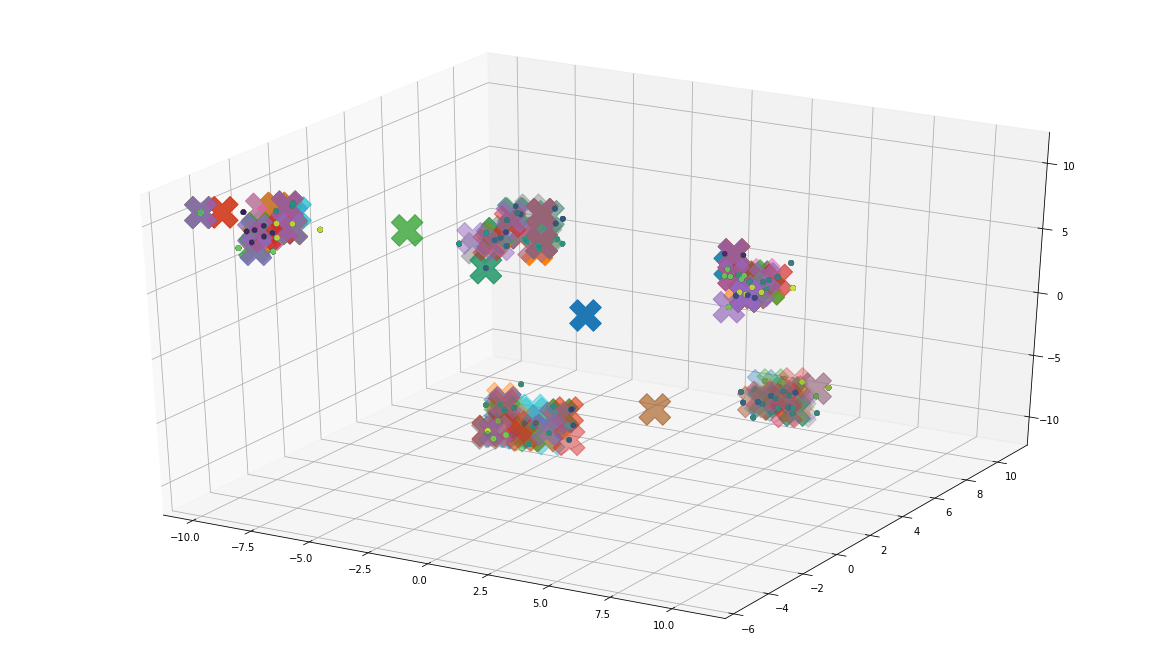

In [8]:
fig = plt.figure()
ax = Axes3D(fig)

for i in range(0, max_cluster_size-min_cluster_size+1):
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels_full[i])
    ax.scatter(centroids_full[i][:, 0], centroids_full[i][:, 1], centroids_full[i][:, 2], marker='X', s=1000)

# plot all Centroids of all Clustersizes

# Calculating distances

## Pretests

In [9]:
# test the linalg.norm distance in a simple case

test_point_a = np.array([1., 1., 1.])
test_point_b = np.array([1., 2., 2.])

distance = np.linalg.norm(test_point_a-test_point_b)
distance

1.4142135623730951

In [10]:
# test how grouping by labels can be achieved

test_data = np.array([[-5.34023562,  4.7472463 ,  3.82332607],
                      [-9.58706542, -3.43446551,  9.70183939],
                      [-8.38501223, -3.90279369,  8.51462008],
                      [5.7082258 ,  2.65857479,  5.40448245],
                      [-7.43166517, -4.39025105,  9.00321635]])
test_labels = np.array([1, 0, 1, 0, 1])

test_data[test_labels == 1]


array([[-5.34023562,  4.7472463 ,  3.82332607],
       [-8.38501223, -3.90279369,  8.51462008],
       [-7.43166517, -4.39025105,  9.00321635]])

## Group data content by cluster (for each cluster size)

In [11]:
data_all_k = []
for h in range(len(centroids_full)):
    data_one_k = []
    for i in range(max(labels_full[h])+1):
        data_one_k.append(data[labels_full[h] == i])
    data_all_k.append(data_one_k)


### Check generated Groups

In [12]:
print("Root Items in data_all_k:", len(data_all_k))
for i in range(len(data_all_k)):
    print("Item", i, ":", len(data_all_k[i]), "Clusters")

Root Items in data_all_k: 25
Item 0 : 1 Clusters
Item 1 : 2 Clusters
Item 2 : 3 Clusters
Item 3 : 4 Clusters
Item 4 : 5 Clusters
Item 5 : 6 Clusters
Item 6 : 7 Clusters
Item 7 : 8 Clusters
Item 8 : 9 Clusters
Item 9 : 10 Clusters
Item 10 : 11 Clusters
Item 11 : 12 Clusters
Item 12 : 13 Clusters
Item 13 : 14 Clusters
Item 14 : 15 Clusters
Item 15 : 16 Clusters
Item 16 : 17 Clusters
Item 17 : 18 Clusters
Item 18 : 19 Clusters
Item 19 : 20 Clusters
Item 20 : 21 Clusters
Item 21 : 22 Clusters
Item 22 : 23 Clusters
Item 23 : 24 Clusters
Item 24 : 25 Clusters


## Calculate Distances

In [13]:
summed_distances_per_k = []
for h in range(len(data_all_k)):
    added_distances_per_cluster = 0
    for i in range(len(centroids_full[h])):
        all_distances = 0
        for j in range(len(data_all_k[h][i])):
            single_distance = np.linalg.norm(centroids_full[h][i]-data_all_k[h][i][j])
            all_distances += single_distance
        added_distances_per_cluster += all_distances
    summed_distances_per_k.append(added_distances_per_cluster)

### Check calculated sums

In [14]:
summed_distances_per_k

[970.3835274220163,
 660.9046509310507,
 455.98290239366514,
 298.5670005983097,
 167.48115312687474,
 134.77306930730782,
 126.87850394728083,
 120.67461796105644,
 116.3017496191432,
 111.08154447312387,
 106.40911707692256,
 102.63084962443112,
 100.96154439439715,
 96.02086863726866,
 92.30210244960652,
 89.60002106930168,
 88.56981947116441,
 86.96827792096846,
 84.60864387746035,
 81.66866981865729,
 79.16133117657257,
 77.20685765674911,
 75.73260161444792,
 73.11127554893594,
 72.88346369835645]

## Plot Elbow Chart

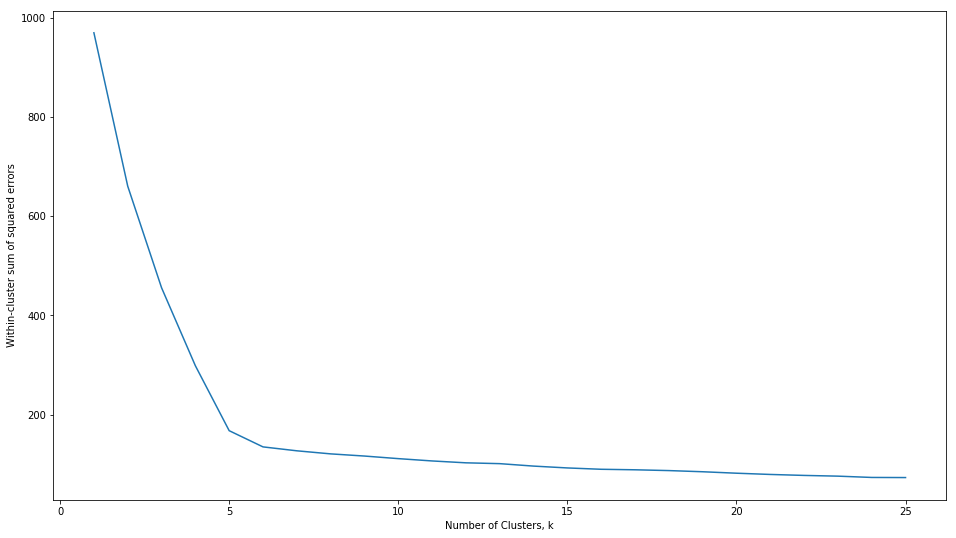

In [15]:
plt.plot(range(1,len(summed_distances_per_k)+1),summed_distances_per_k)
plt.ylabel('Within-cluster sum of squared errors')
plt.xlabel('Number of Clusters, k')
plt.show()

# Transform distances

In [16]:
transformed_distances = []
for item in summed_distances_per_k:
    transformed_distances.append(item ** (-2))
transformed_distances

[1.0619722505694102e-06,
 2.2894037180363277e-06,
 4.809532710638122e-06,
 1.1218024638736813e-05,
 3.565070439841688e-05,
 5.505461905012724e-05,
 6.211892075000317e-05,
 6.867017194635962e-05,
 7.393115712732857e-05,
 8.104312537089698e-05,
 8.831659580086935e-05,
 9.493889040053945e-05,
 9.81042968601083e-05,
 0.00010845978498771933,
 0.00011737532642806034,
 0.00012456148478645835,
 0.00012747601571306202,
 0.00013221424788437697,
 0.00013969167719166868,
 0.00014993017084869318,
 0.00015957829574928306,
 0.00016775993385193195,
 0.00017435493629154055,
 0.0001870816872511279,
 0.00018825303754068615]

## Plot transformed distances

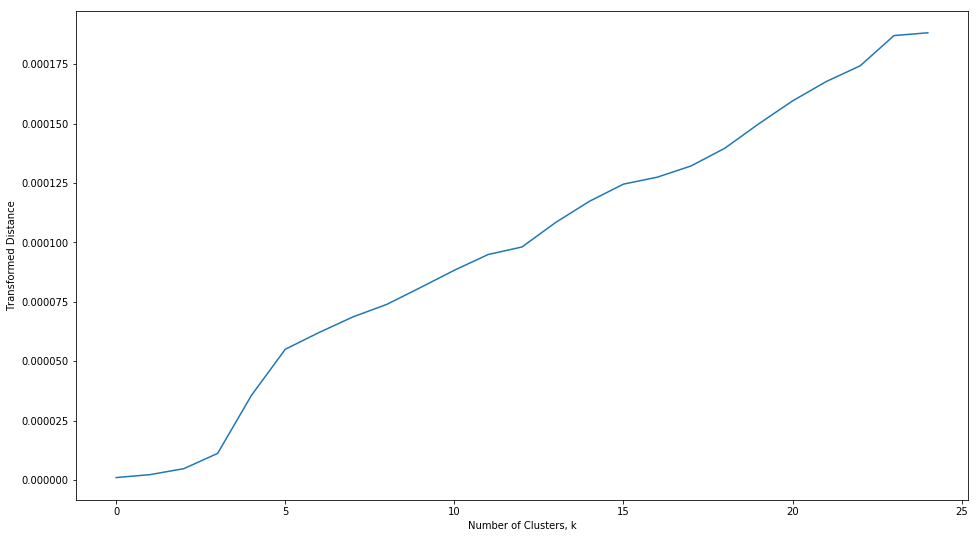

In [17]:
plt.plot(transformed_distances)
plt.ylabel('Transformed Distance')
plt.xlabel('Number of Clusters, k')
plt.show()

# Calculate Jumps

In [18]:
jumps = []
jumps.append(transformed_distances[0])
for i in range(1, len(transformed_distances)):
    jumps.append(transformed_distances[i]-transformed_distances[i-1])
jumps

[1.0619722505694102e-06,
 1.2274314674669176e-06,
 2.5201289926017944e-06,
 6.4084919280986904e-06,
 2.443267975968007e-05,
 1.940391465171036e-05,
 7.06430169987593e-06,
 6.5512511963564525e-06,
 5.26098518096895e-06,
 7.111968243568405e-06,
 7.273470429972371e-06,
 6.6222945996701035e-06,
 3.1654064595688436e-06,
 1.0355488127611036e-05,
 8.915541440341013e-06,
 7.1861583583980045e-06,
 2.9145309266036723e-06,
 4.73823217131495e-06,
 7.477429307291712e-06,
 1.0238493657024498e-05,
 9.648124900589884e-06,
 8.18163810264888e-06,
 6.595002439608601e-06,
 1.2726750959587361e-05,
 1.1713502895582437e-06]

## Plot Jumps

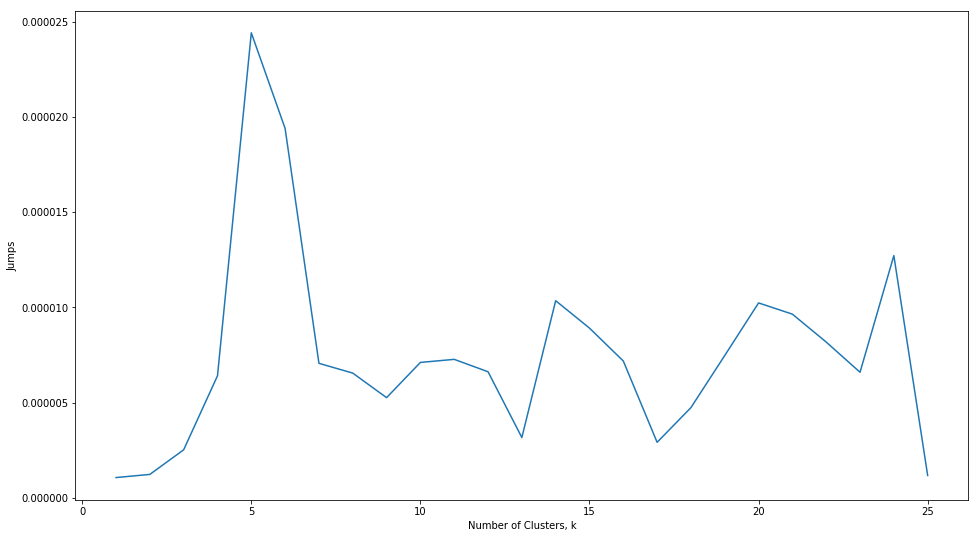

In [19]:
plt.plot(range(1,len(jumps)+1),jumps)
plt.ylabel('Jumps')
plt.xlabel('Number of Clusters, k')
plt.show()

In [20]:
best_cluster_size = jumps.index(max(jumps))+1
best_cluster_size

5

# Result 

So the calculated **optimal cluster size is 5**. But, as written in the comment of min/max_cluster_size assignment, if max_cluster_size values larger than 38 are used the result will differ.

# Output Datapoints with label of best cluster size

In [21]:
data_output = data_all_k[best_cluster_size-1]

Instead of outputting a list with each datapoint appended by its label, a list is generated.
The list contains n arrays, where n is the best cluster size. In each array the datapoints are listed, which belong to the same cluster. i=0 : first cluster, i=1 : second cluster, ...

In [22]:
data_output

[array([[-3.40526552,  2.28142739, -7.63117179],
        [-4.61692581,  2.83368789, -7.96289974],
        [-3.07076859,  1.47953458, -7.79850529],
        [-1.39236828,  0.98984384, -8.77572229],
        [-0.97476618,  2.97478707, -8.53008822],
        [-3.40786306,  3.24854313, -6.19404276],
        [-1.36947289,  2.1142807 , -8.67632312],
        [-1.70617854,  1.66601247, -7.9268549 ],
        [-2.34049748, -0.05101276, -7.26979297],
        [-3.79872596,  2.55320535, -7.51800226],
        [-2.52701507,  2.89903674, -8.80825287],
        [-2.57316647,  1.2603038 , -8.61121531],
        [-1.54920423,  3.68675988, -7.89780973],
        [-2.71827605,  0.74916694, -8.58455388],
        [-1.40993477,  2.42873792, -6.75821297],
        [-2.85053053,  2.11211451, -7.10981719],
        [-0.07713301,  1.5195989 , -8.37143096],
        [-2.71713552,  2.49213997, -8.59667177],
        [-3.8855629 ,  1.93229341, -9.39347086],
        [-1.67554326,  3.78011122, -8.06093994]]),
 array([[-5.340235

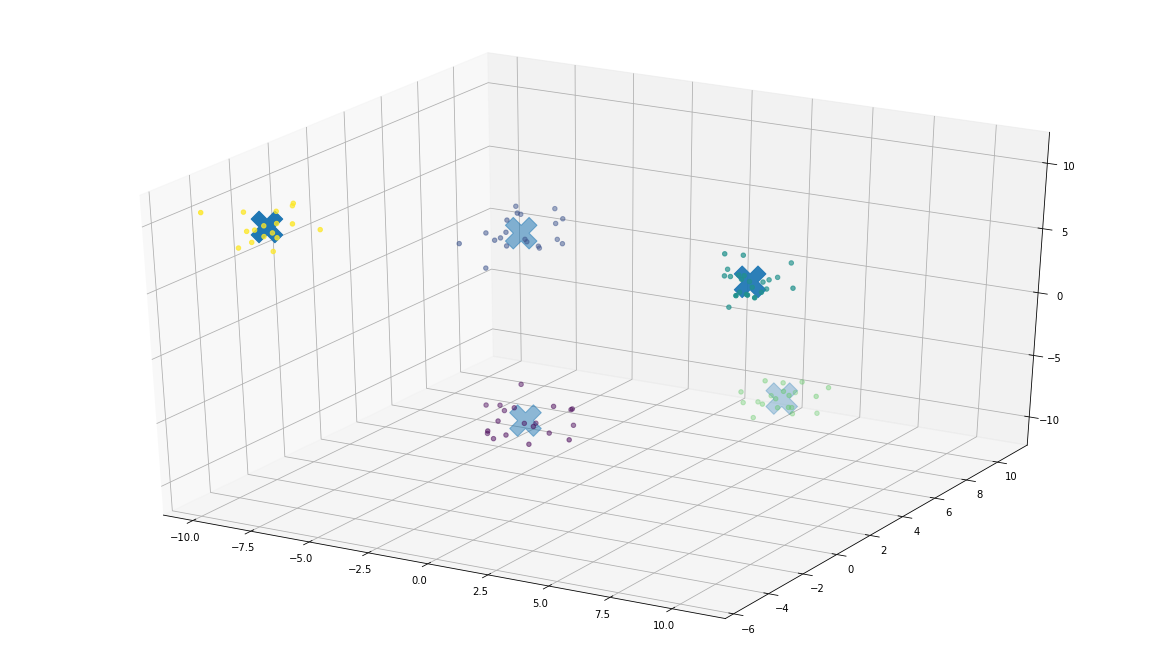

In [23]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels_full[best_cluster_size-1])
ax.scatter(centroids_full[best_cluster_size-1][:, 0], centroids_full[best_cluster_size-1][:, 1], centroids_full[best_cluster_size-1][:, 2], marker='X', s=1000)